In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.metrics import classification_report

### Loading Datasets

In [3]:
df = pd.read_csv('cancer-patient_datasets_Change.csv')
df.head()
#df.describe()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,1
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,1
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,1


### Specify the target variable and its distribution

In [41]:
target = df['Level']
#print(target)

### Split dataset into training and test data

In [5]:
seed = 7
train_data, test_data = train_test_split(df, test_size=0.3, 
random_state= 7)

### Balance Split dataset into training and test data

In [6]:
seed = 7
train_data, test_data = train_test_split(df, test_size=0.3, 
random_state=seed, stratify=target)

### Separate the independent and target variables

In [7]:
# separate the independent and target variables from training data
train_x = train_data.drop(columns=['index','Patient Id','Level'],axis=1)
train_y = train_data['Level']
# separate the independent and target variables from test data
test_x = test_data.drop(columns=['index','Patient Id','Level'],axis=1)
test_y = test_data['Level']
test_x

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
410,48,2,1,6,7,8,7,6,7,7,...,7,3,2,6,4,2,3,1,2,1
494,18,2,3,2,1,3,2,1,3,2,...,2,2,2,1,3,4,4,1,4,1
975,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
221,18,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
957,32,1,1,6,7,5,3,2,6,2,...,2,3,3,7,7,4,8,7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,23,2,4,2,3,4,2,3,2,4,...,4,1,3,4,2,4,2,4,3,1
706,27,1,3,1,4,3,2,3,4,3,...,1,3,2,2,4,2,2,3,4,3
560,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
310,33,1,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4


### Normalization

In [8]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#train_x = scaler.fit_transform(train_x)
#test_x = scaler.fit_transform(test_x)
#print(train_x)
#print(test_x)

### Standarization

In [9]:
"""
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
train_x = scaling.fit_transform(train_x)
test_x = scaling.fit_transform(test_x)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nscaling = StandardScaler()\ntrain_x = scaling.fit_transform(train_x)\ntest_x = scaling.fit_transform(test_x)\n'

### Logistics Regression

In [40]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model.fit(train_x,train_y)

# make predictions on training data
#lg_predictions_train = lg_model.predict(train_x)
#print('\nLogistics Regression Training Accuracy :', accuracy_score(train_y,lg_predictions_train))

# make predictions on test data
lg_predictions_test = lg_model.predict(test_x)
print('\nLogistics Regression Test Accuracy :', accuracy_score(test_y, lg_predictions_test))


Logistics Regression Test Accuracy : 1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Accuracy,Precision,Recall,F1Score Using Function

In [13]:
print(classification_report(test_y,lg_predictions_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       209

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### Confusion Matrix

In [17]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

conf_matrix = confusion_matrix(test_y,lg_predictions_test)
print(conf_matrix)

[[ 91   0]
 [  0 209]]


### Accuracy,Precision,Recall,F1Score Manually Calculate

In [38]:
tp,fp,fn,tn=confusion_matrix(test_y,lg_predictions_test).ravel()
(tp,fp,fn,tn)

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Precision
precision = tp / (tp + fp)

# Recall
recall = tp / (tp + fn)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


### Visualize Confusion Matrix

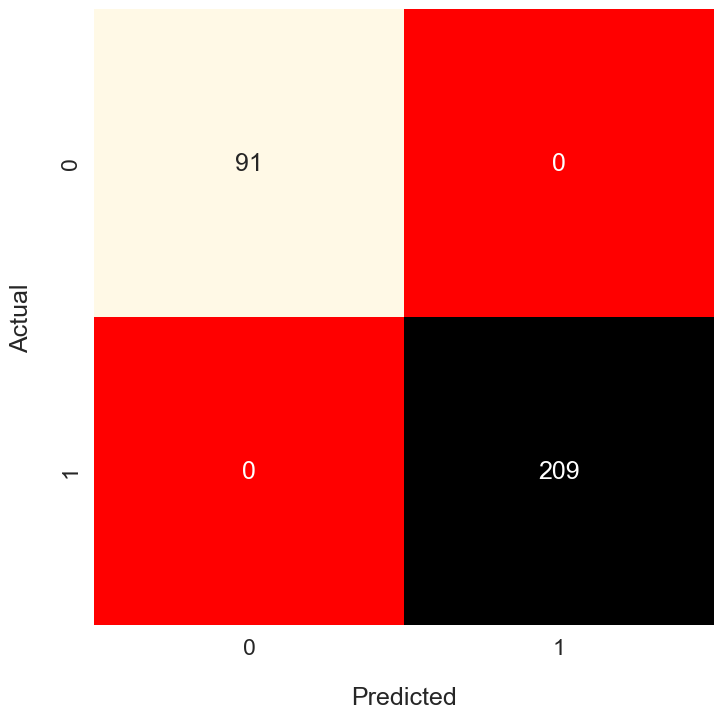

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [22]:
#accuracy = accuracy_score(test_y, lg_predictions_test)
#precision = precision_score(test_y, lg_predictions_test)
#recall = recall_score(test_y, lg_predictions_test)
#f1score = f1_score(test_y, lg_predictions_test)

#compare = pd.DataFrame({'Accuracy': [accuracy], 
                        #'Precision':[precision],
                      # 'Recal':[recall],
                       #'F1Score':[f1score]})
#compare = compare.set_index('Test Accuracy')
#compare=compare.sort_values(by = 'Accuracy', ascending = False)
compare.head()

,Accuracy,Precision,Recal,F1Score
0,1.0,1.0,1.0,1.0


### ROC curve & AUC score

In [30]:
from sklearn.metrics import roc_curve
# predict probabilities
pred_prob1 = lg_model.predict_proba(test_x)

In [32]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(test_y, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

In [43]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(test_y, pred_prob1[:,1])
print("AUC Score:",auc_score1)

AUC Score: 1.0


### Roc Curve

C:\Users\hossa\AppData\Local\Temp\ipykernel_4732\3014605189.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


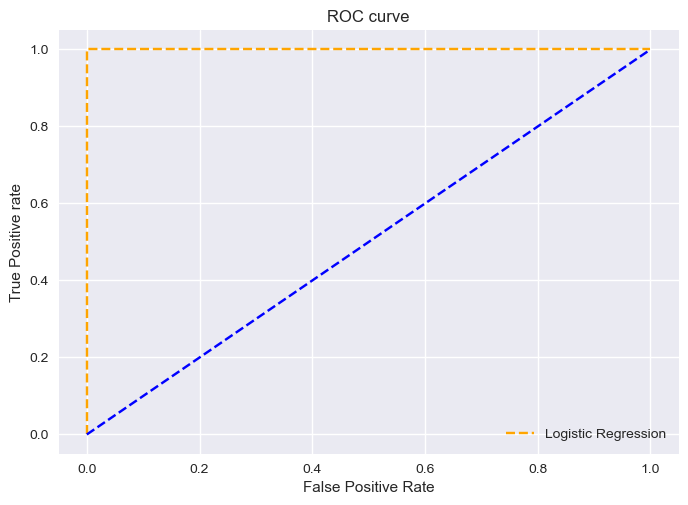

In [36]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();